In [1]:
%config Completer.use_jedi = False

### Importing libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.feature_selection import RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn import metrics



### Loading the data

In [3]:
rawData = pd.read_csv('./data/forestfires.csv')

### Exploratory Analysis

#### Nulls

In [5]:
rawData.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

#### Summary

In [7]:
rawData.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Rain Column

In [8]:
print(len(rawData[rawData['rain'] > 0]))

rawData[rawData['rain'] > 0]

8


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


In [9]:
rawData.drop(labels=['rain'], axis = 1, inplace=True)

#### Explore distribution of area values

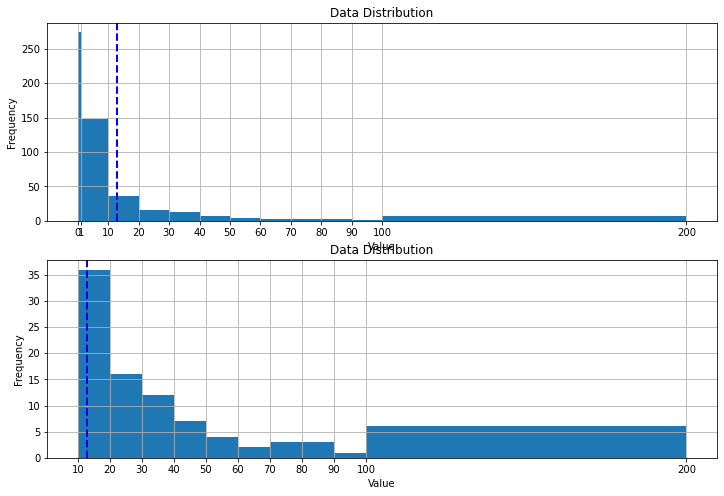

In [12]:
# Get the variable to examine
histData = rawData['area']

meanVal = histData.mean()

# Create a Figure
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.hist(histData, bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2,1,2)
plt.hist(histData, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [13]:
print('The number of records with zero burnt area is:  {}'
      .format(len(rawData[rawData['area'] == 0])))

print('The number of records with non zero burnt area is:  {}'
      .format(len(rawData[rawData['area'] != 0])))

print("The number of records with burnt area between 0 and 1 hectares is:  {}"
      .format(len(rawData.loc[(rawData['area'] > 0) & (rawData['area'] <= 1)])))

The number of records with zero burnt area is:  247
The number of records with non zero burnt area is:  270
The number of records with burnt area between 0 and 1 hectares is:  27


In [15]:
limits = [10, 50, 100, 200, 500, 1000, 1100]

for each in limits:
    
    print('Burnt area more than {} hectares is:  {}'
          .format(each, len(rawData[rawData['area'] > each])))

Burnt area more than 10 hectares is:  95
Burnt area more than 50 hectares is:  24
Burnt area more than 100 hectares is:  11
Burnt area more than 200 hectares is:  5
Burnt area more than 500 hectares is:  2
Burnt area more than 1000 hectares is:  1
Burnt area more than 1100 hectares is:  0


#### Explore the distribution of other values

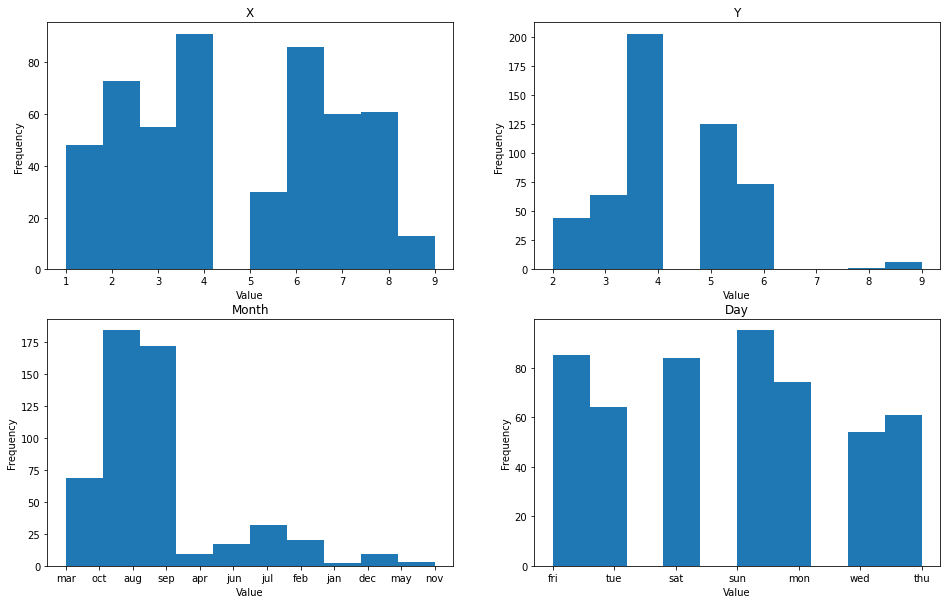

In [17]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['X'])
plt.grid(False)
plt.title('X')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['Y'])
plt.grid(False)
plt.title('Y')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['month'])
plt.grid(False)
plt.title('Month')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(rawData['day'])
plt.grid(False)
plt.title('Day')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

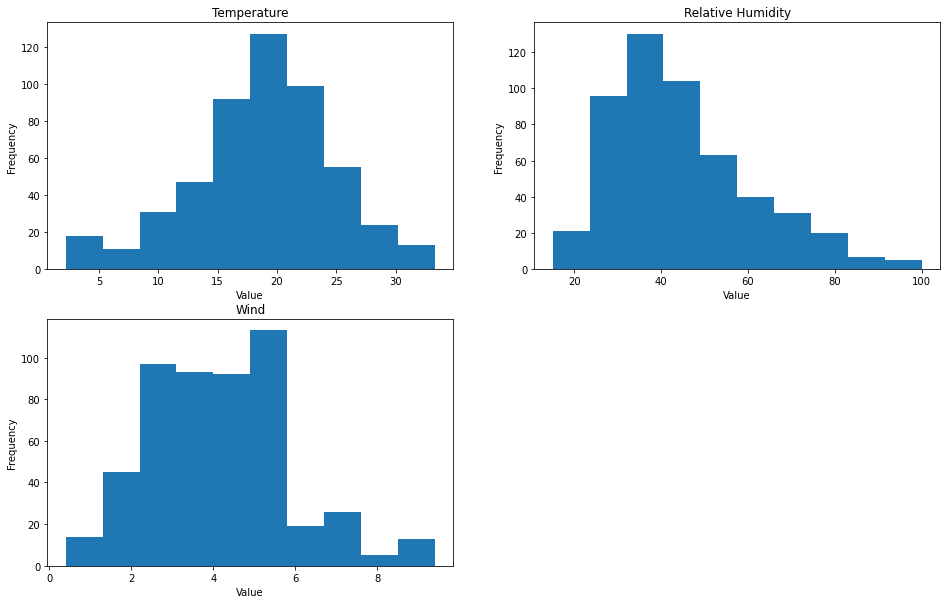

In [19]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['temp'])
plt.grid(False)
plt.title('Temperature')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['RH'])
plt.grid(False)
plt.title('Relative Humidity')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['wind'])
plt.grid(False)
plt.title('Wind')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

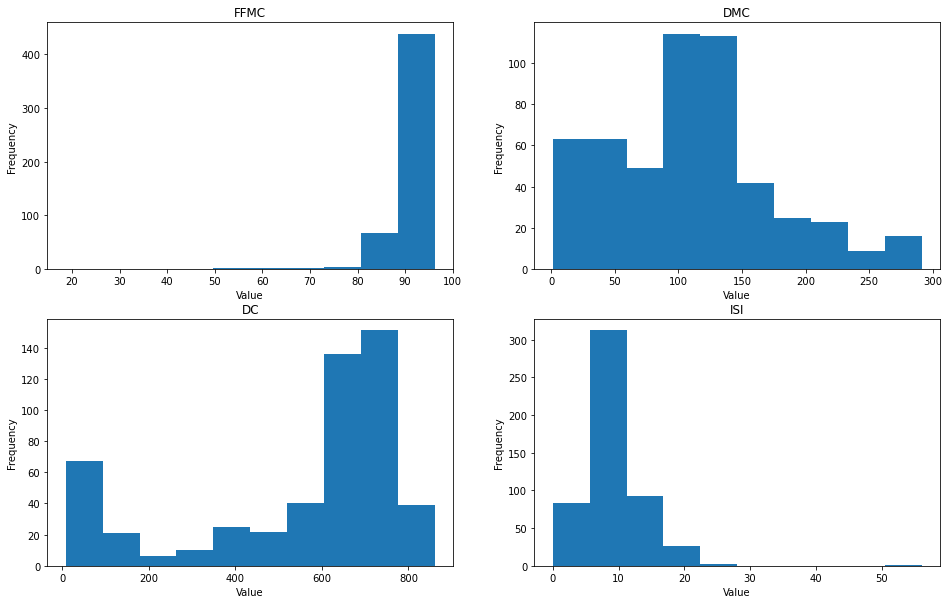

In [20]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['FFMC'])
plt.grid(False)
plt.title('FFMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['DMC'])
plt.grid(False)
plt.title('DMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['DC'])
plt.grid(False)
plt.title('DC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(rawData['ISI'])
plt.grid(False)
plt.title('ISI')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

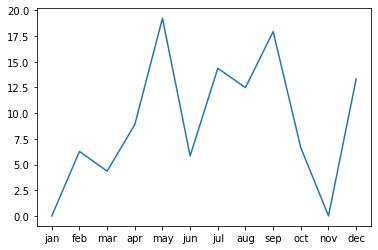

In [55]:
months = {'jan' : 0, 'feb' : 1, 'mar' : 2, 'apr' : 3, 'may' : 4, 'jun' : 5, 'jul' : 6,
               'aug' : 7, 'sep' : 8, 'oct' : 9, 'nov' : 10, 'dec' : 11}

plt.plot(rawData[['month', 'area']].groupby(by='month').agg('mean').sort_values(by='month', key = lambda x: x.map(months)))

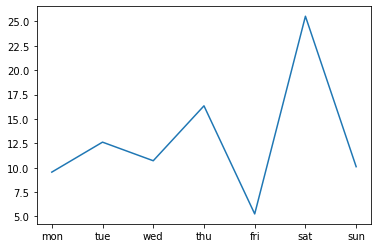

In [59]:
months = {'mon' : 0, 'tue' : 1, 'wed' : 2, 'thu' : 3, 'fri' : 4, 'sat' : 5, 'sun' : 6}

plt.plot(rawData[['day', 'area']].groupby(by='day').agg('mean').sort_values(by='day', key = lambda x: x.map(months)))

#### Create a dataset without outliers

In [21]:
thirdQuartile = rawData[['area']].describe().at['75%', 'area']

firstQuartile = rawData[['area']].describe().at['25%', 'area']

IQR = thirdQuartile - firstQuartile

outlierLimit = 1.5 * IQR

In [22]:
outlierLimit

9.855

In [24]:
print(len(rawData[rawData['area'] > outlierLimit]))

97


In [25]:
cleanDF = rawData[rawData['area'] <= outlierLimit]

In [26]:
cleanDF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.611905,4.302381,90.620714,109.586190,543.507857,9.078333,18.884762,44.509524,3.948095,1.515357
std,2.312021,1.253727,5.767668,62.958875,249.958323,4.634413,5.638184,16.240655,1.763383,2.486176
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,69.425000,436.600000,6.500000,15.575000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.650000,106.900000,658.200000,8.400000,19.200000,42.000000,4.000000,0.000000
75%,6.250000,5.000000,92.800000,142.400000,713.900000,10.700000,22.800000,53.000000,4.900000,2.140000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,32.600000,100.000000,9.400000,9.770000


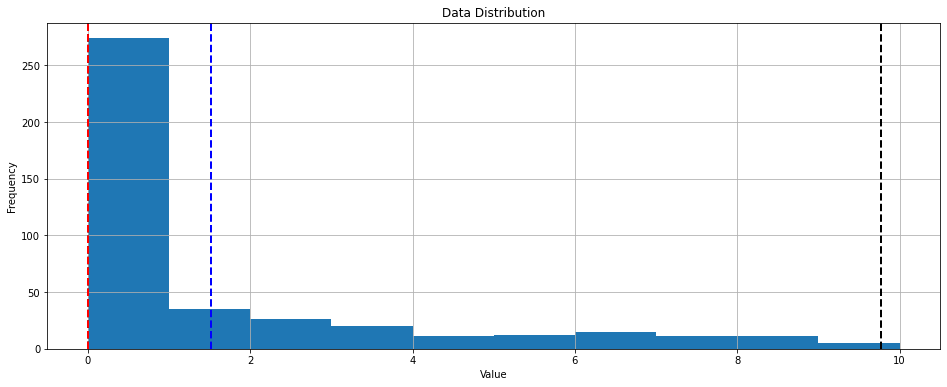

In [27]:
histData = cleanDF['area']


plt.figure(figsize=(16, 6))

minVal = histData.min()
meanVal = histData.mean()
medVal = histData.median()
maxVal = histData.max()


plt.hist(histData, bins=[0,1,2,3,4,5,6,7,8,9,10])

plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.axvline(x=maxVal, color = 'black', linestyle='dashed', linewidth = 2)
plt.axvline(x=minVal, color = 'black', linestyle='dashed', linewidth = 2)
plt.axvline(x=medVal, color = 'red', linestyle='dashed', linewidth = 2)

plt.grid(True)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Train/Test split both the datasets

In [112]:
X, Y = rawData[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']], rawData[['area']]

In [113]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y,
                                                test_size=0.20,
                                                random_state=9892)

In [125]:
XClean, YClean = cleanDF[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']], cleanDF[['area']]

In [126]:
XCleanTrain, XCleanTest, YCleanTrain, YCleanTest = train_test_split(XClean, YClean,
                                                                    test_size=0.20,
                                                                    random_state=9892)

In [64]:
print ('Training Set: {} rows\n\nTest Set: {} rows'.format(XTrain.shape[0], XTest.shape[0]))

Training Set: 413 rows

Test Set: 104 rows


### Model Evaluation

#### Predictions

In [65]:
def regressionResults(YTrue, predictions):

    # Regression metrics
    explainedVariance=metrics.explained_variance_score(YTrue, predictions)
    MAE=metrics.mean_absolute_error(YTrue, predictions) 
    MSE=metrics.mean_squared_error(YTrue, predictions) 
    r2=metrics.r2_score(YTrue, predictions)

    print('\nexplained_variance: ', round(explainedVariance,4))    
    print('\nr2: ', round(r2,4))
    print('\nMAE: ', round(MAE,4))
    print('\nMSE: ', round(MSE,4))
    print('\nRMSE: ', round(np.sqrt(MSE),4))

#### Residuals

### Regression

#### Try a bunch of different models (Play with parameters and pick best one)

In [73]:
LinRegModel_1 = None
LinRegModel_1 = LinearRegression()

LinRegModel_1.fit(X=XTrain, y=YTrain)

predictions = LinRegModel_1.predict(XTest)

regressionResults(YTest.values, predictions)


explained_variance:  0.0276

r2:  0.0275

MAE:  20.4458

MSE:  5265.9634

RMSE:  72.567


Text(0.5, 1.0, 'Daily Bike Share Predictions')

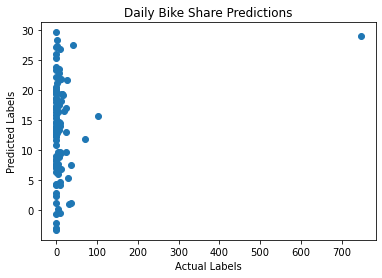

In [74]:
plt.scatter(YTest.values, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### Regression (Feature Selection)

#### Recursive Feature Elimination

In [79]:
RFESelector = RFE(estimator = LinearRegression(), n_features_to_select = 4)

RFESelector.fit(XTrain, YTrain)

XTrain.columns[RFESelector.get_support()]

Index(['X', 'ISI', 'temp', 'wind'], dtype='object')

In [76]:
XTrainRFE = RFESelector.transform(XTrain)
XTestRFE = RFESelector.transform(XTest)

In [80]:
XTrainRFE = pd.DataFrame(RFESelector.transform(XTrain), columns = XTrain.columns[RFESelector.get_support()])

In [85]:
XTestRFE = pd.DataFrame(RFESelector.transform(XTest), columns = XTest.columns[RFESelector.get_support()])

In [91]:
LinRegModel_RFE = None
LinRegModel_RFE = LinearRegression()

LinRegModel_RFE.fit(X=XTrainRFE, y=YTrain)

predictions = None
predictions = LinRegModel_RFE.predict(XTestRFE)

regressionResults(YTest.values, predictions)


explained_variance:  0.0203

r2:  0.0203

MAE:  20.4794

MSE:  5305.2276

RMSE:  72.837


####  Select From Model

In [86]:
SFMSelector = SelectFromModel(estimator=LinearRegression(), max_features = 4)

SFMSelector.fit(XTrain, YTrain)

XTrain.columns[SFMSelector.get_support()]

Index(['X', 'ISI', 'temp', 'wind'], dtype='object')

In [93]:
XTrainSFM = SFMSelector.transform(XTrain)
XTestSFM = SFMSelector.transform(XTest)

In [94]:
XTrainSFM = pd.DataFrame(SFMSelector.transform(XTrain), columns = XTrain.columns[SFMSelector.get_support()])

In [95]:
XTestSFM = pd.DataFrame(RFESelector.transform(XTest), columns = XTest.columns[SFMSelector.get_support()])

In [96]:
LinRegModel_SFM = None
LinRegModel_SFM = LinearRegression()

LinRegModel_SFM.fit(X=XTrainSFM, y=YTrain)

predictions = None
predictions = LinRegModel_SFM.predict(XTestSFM)

regressionResults(YTest.values, predictions)


explained_variance:  0.0203

r2:  0.0203

MAE:  20.4794

MSE:  5305.2276

RMSE:  72.837


####  Sequential Feature Selection

In [102]:
SFSSelector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 4, direction ='backward')

SFSSelector.fit(XTrain, YTrain)

XTrain.columns[SFSSelector.get_support()]

Index(['X', 'Y', 'ISI', 'wind'], dtype='object')

In [103]:
XTrainSFS = SFSSelector.transform(XTrain)
XTestSFS = SFSSelector.transform(XTest)

In [104]:
XTrainSFS = pd.DataFrame(SFSSelector.transform(XTrain), columns = XTrain.columns[SFSSelector.get_support()])

In [105]:
XTestSFS = pd.DataFrame(SFSSelector.transform(XTest), columns = XTest.columns[SFSSelector.get_support()])

In [106]:
LinRegModel_SFS = None
LinRegModel_SFS = LinearRegression()

LinRegModel_SFS.fit(X=XTrainSFS, y=YTrain)

predictions = None
predictions = LinRegModel_SFS.predict(XTestSFS)

regressionResults(YTest.values, predictions)


explained_variance:  0.0058

r2:  0.0055

MAE:  19.105

MSE:  5385.2956

RMSE:  73.3846


### Regression (Transformations)

#### Try a bunch of different models on transformed data

In [114]:
pt = PowerTransformer()
ptY = PowerTransformer()

pt.fit(XTrain)
ptY.fit(YTrain)

XTrainPT = pt.transform(XTrain)
XTrainPTDF = pd.DataFrame(XTrainPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

YTrainPT = ptY.transform(YTrain)
YTrainPTDF = pd.DataFrame(YTrainPT, columns=['area'])

In [116]:
XTestPT = pt.transform(XTest)
XTestPTDF = pd.DataFrame(XTestPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

YTestPT = ptY.transform(YTest)
YTestPTDF = pd.DataFrame(YTestPT, columns=['area'])

In [117]:
LinRegModelTransform = LinearRegression()

In [119]:
LinRegModelTransform.fit(X=XTrainPTDF, y=YTrainPTDF)
    
predictions = LinRegModelTransform.predict(XTestPTDF)

In [120]:
actualPred = ptY.inverse_transform(predictions)

In [122]:
regressionResults(YTest.values, actualPred)


explained_variance:  0.0024

r2:  -0.0291

MAE:  14.1737

MSE:  5572.9097

RMSE:  74.6519


Text(0.5, 1.0, 'Daily Bike Share Predictions')

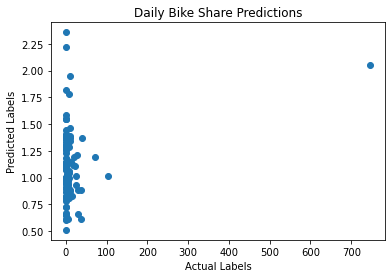

In [124]:
plt.scatter(YTest.values, actualPred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

### Regression (Outliers removed)

In [127]:
LinRegModelClean = LinearRegression()

LinRegModelClean.fit(X=XCleanTrain, y=YCleanTrain)

predictions = LinRegModelClean.predict(XCleanTest)

regressionResults(YCleanTest.values, predictions)


explained_variance:  -0.021

r2:  -0.0459

MAE:  1.9925

MSE:  6.8773

RMSE:  2.6225


Text(0.5, 1.0, 'Daily Bike Share Predictions')

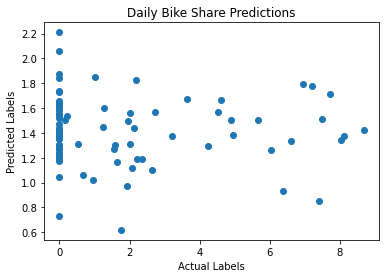

In [128]:
plt.scatter(YCleanTest.values, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

#### Transformations

In [129]:
pt = PowerTransformer()

pt.fit(XCleanTrain)

XCleanTrainPT = pt.transform(XCleanTrain)

XCleanTrainPTDF = pd.DataFrame(XCleanTrainPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [131]:
XCleanTestPT = pt.transform(XCleanTest)

XCleanTestPTDF = pd.DataFrame(XCleanTestPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

## Here we are doing the same thing, but for the dependent variable 'SalePrice' exclusively
ptY = PowerTransformer()

# PowerTransformer requires a matrix/DataFrame
ptY.fit(YCleanTrain)

YCleanTrainPT = ptY.transform(YCleanTrain)
YCleanTrainPTDF = pd.DataFrame(YCleanTrainPT, columns=['area'])

YCleanTestPT = ptY.transform(YCleanTest)
YCleanTestPTDF = pd.DataFrame(YCleanTestPT, columns=['area'])

In [132]:
LinRegModelCleanTransform = LinearRegression()

In [134]:
LinRegModelCleanTransform.fit(X=XCleanTrainPTDF, y=YCleanTrainPTDF)
    
predictions = LinRegModelClean.predict(XCleanTestPTDF)

In [135]:
actualPred = ptY.inverse_transform(predictions)

In [136]:
regressionResults(YCleanTest.values, actualPred)


explained_variance:  -0.0051

r2:  -0.3419

MAE:  1.8517

MSE:  8.8236

RMSE:  2.9705


Text(0.5, 1.0, 'Daily Bike Share Predictions')

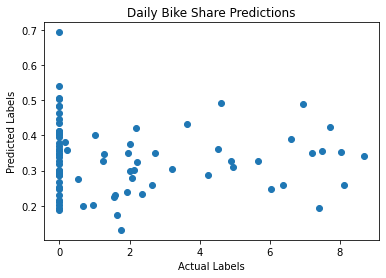

In [137]:
plt.scatter(YCleanTest.values, actualPred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')